In [1]:
# IMPORTS
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
img = cv2.imread('Train/0/00000_00000_00000.png')
blur_image = cv2.GaussianBlur(img, (7,7), 0)

img = cv2.resize(img, (960, 540)) 
blur_image = cv2.resize(blur_image, (960, 540)) 

cv2.imshow('Original Image', img)
cv2.imshow('Blur Image', blur_image)

cv2.waitKey(0)
cv2.destroyAllWindows() 

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Epoch 1/15
981/981 [==============================] - 52s 53ms/step - loss: 2.2670 - accuracy: 0.4092 - val_loss: 0.8224 - val_accuracy: 0.7720
Epoch 2/15
981/981 [==============================] - 54s 55ms/step - loss: 0.8802 - accuracy: 0.7345 - val_loss: 0.3150 - val_accuracy: 0.9112
Epoch 3/15
981/981 [==============================] - 55s 56ms/step - loss: 0.4876 - accuracy: 0.8553 - val_loss: 0.1615 - val_accuracy: 0.9526
Epoch 4/15
981/981 [==============================] - 56s 57ms/step - loss: 0.3716 - accuracy: 0.8916 - val_loss: 0.1216 - val_accuracy: 0.9716
Epoch 5/15
981/981 [==============================] - 53s 54ms/step - loss: 0.3137 - accuracy: 0.9096 - val_loss: 0.0923 - val_accuracy: 0.9768
Epoch 6/15
981/981 [==============================] - 53s 54ms/step - loss: 0.2771 - accuracy: 0.9205 - val_loss: 0.0958 - val_accuracy: 0.9746
Epoch 7/15
981/981 [==============================] - 

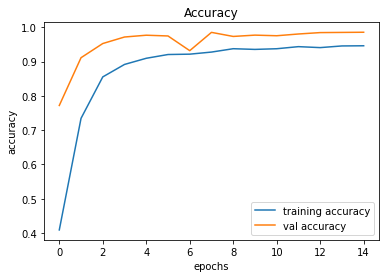

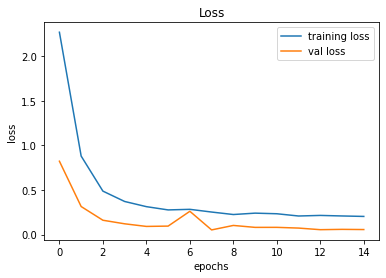

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [4]:
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=1)
print(pred)

# Accuracy with the test data
print(accuracy_score(labels, pred)*100)

model.save('traffic_classifier.h5')

[16  1 38 ... 32  7 10]
94.82977038796517


In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        